## Binary Classification and Multi-class Classification

### Data for Binary Classification:
* URL: https://www.kaggle.com/lodetomasi1995/income-classification
* Column “income” is the target label to classify.


In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, probplot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# On Kaggle Notebook, after adding the data, you can import the data as Pandas DataFrame as follows
df = pd.read_csv("income_evaluation.csv")

### Displaying columns and Length of columns

In [4]:
print(df.columns)
print(" ")
print("Lenght of columns: ",len(df.columns))
print(" ")
print("Total numbe of data fields:",len(df))

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')
 
Lenght of columns:  15
 
Total numbe of data fields: 32561


<font color='blue'>As we can see some spaces in the column names we have processed the data to remove the spaces in the coulumns.</blue>

In [5]:
## we could see some spaces in the columns names so we are removing it manually 

df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status', 'occupation', 'relationship', 'race', 
              'sex','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

df.columns = df.columns.str.replace('-','_')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Question 1:
Examine the features of the data. Identify which feature is continuous and which feature is categorical. Make some analyses and use your analyses to discuss whether each feature could be useful for classify the "income."

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


We have total of 15 columns in the datset. As per the initial analysis on the dataset we can say that we have 6 continuous features and 9 categorical fetures. 

## Categorical Features:

1. workclass
2. education
3. marital-status
4. occupation
5. relationship
6. race
7. sex
8. native-country
9. income

## Continuous Features:

1. age
2. fnlwgt
3. education-num
4. capital-gain
5. capital-loss
6. hours-per-week

From the above feature analysis we could see that the task is classification task and the target variable is "income". By observing the dataset we have continuous and categorical variables for doing the classification analysis on the target variable (income).

Here, both continuous and categorical features plays important role in classifying the target variable. further analysis on each feature is done in the below steps on how important the feature is useful in classification. 


In [8]:
correlation = df.corr()
correlation

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


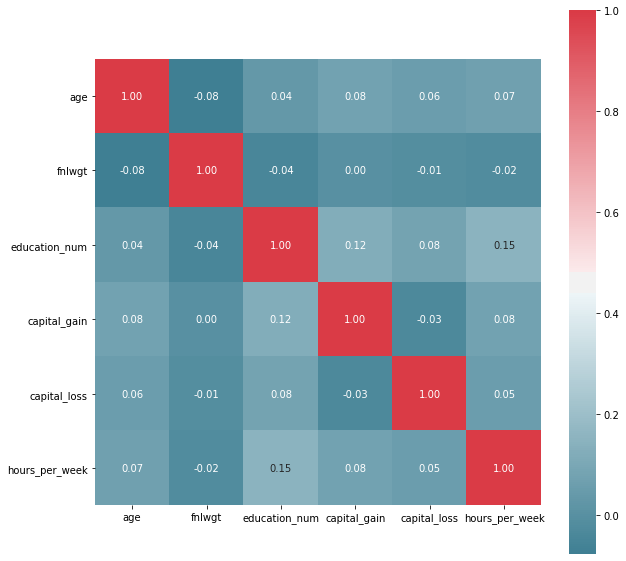

In [9]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(correlation, annot=True, fmt='.2f',mask=np.zeros_like(correlation, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)

#### Question 2:
Create plots to visualize the distribution of the label "income" and the distribution of  each continuous feature. Do you notice anything that might require special treatment? Discuss your findings and suggestions on wrangling the data for the classification task.

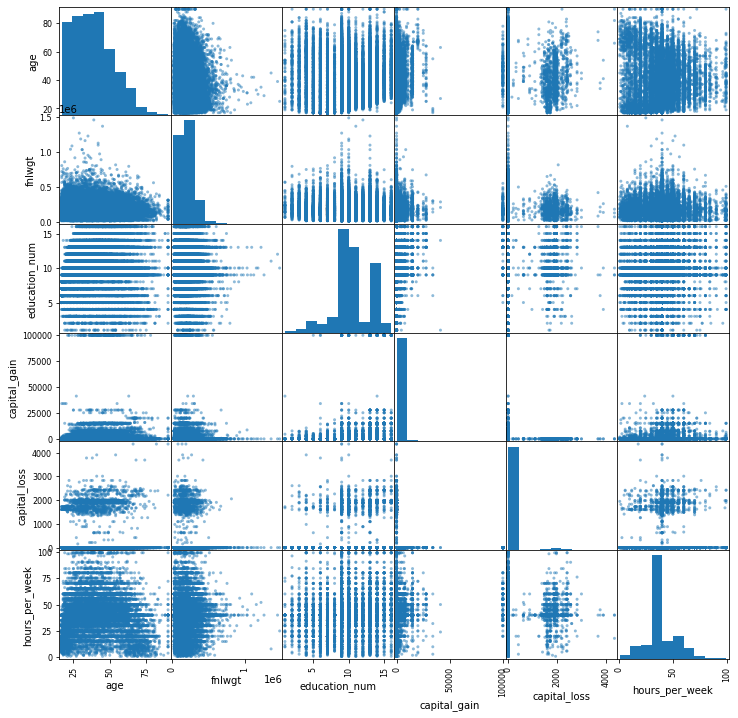

In [10]:
from pandas.plotting import scatter_matrix

attributes = ["age", "fnlwgt", "education_num",
              "capital_gain", "capital_loss", "hours_per_week"]
scatter_matrix(df[attributes], figsize=(12, 12))
plt.show()

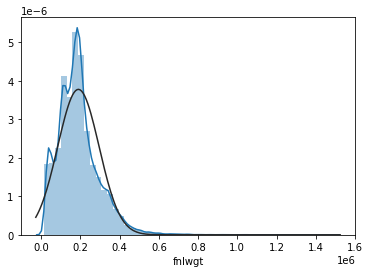

In [11]:
sns.distplot(df["fnlwgt"], fit = norm)

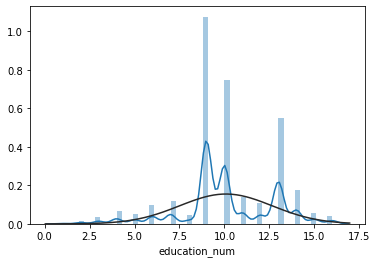

In [12]:
sns.distplot(df["education_num"], fit = norm)

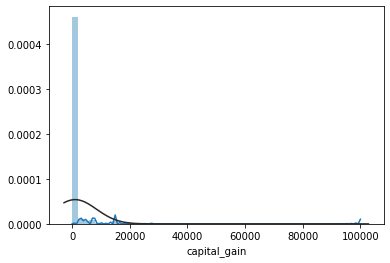

In [13]:
sns.distplot(df["capital_gain"], fit = norm)

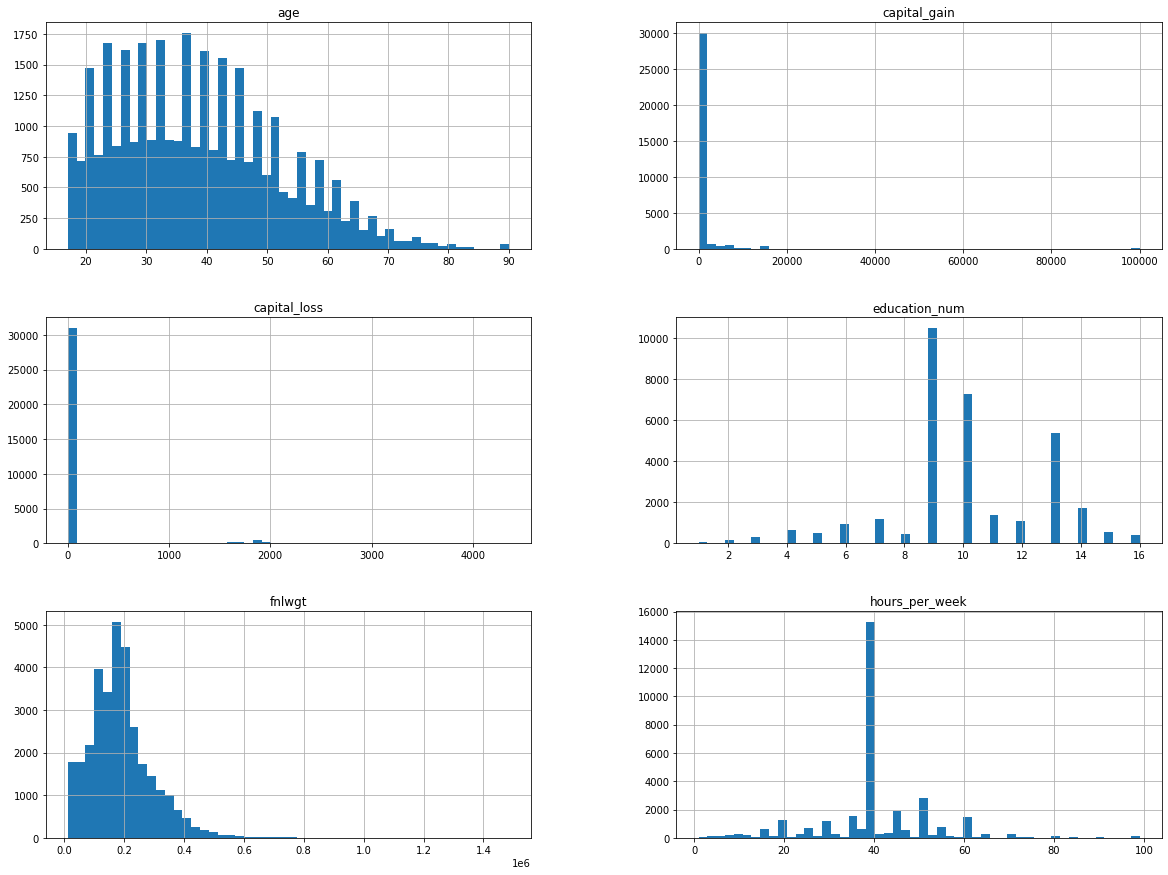

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

#### Distribution of each continuous feature

<font color='blue'>age: From the distribution plot of age variable the data is slightly positively skewed. The variable seems fine with the data.</blue>

<font color='blue'>fnlwgt: From the distribution of the data(fnlwgt) the majority of the data lies with in the normal curve. looks like the data is normal.</blue>

<font color='blue'>education_num and hours_per_wek: From the data distribution plot of the eduation and hours_per_week variable the data is more concentated on some categories. </blue>

<font color='blue'>Catpital_gain and capital_loss: from the data distribution plot of the gain and loss looks same like the data is peaked at one place. </blue>


#### Visualization of some categorical features

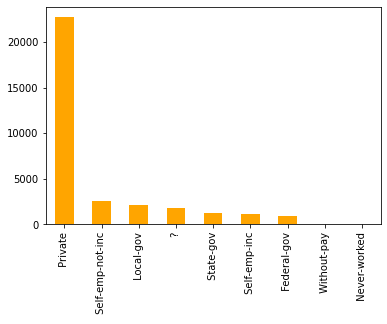

In [15]:
df.workclass.value_counts().plot(kind="bar", color="orange")

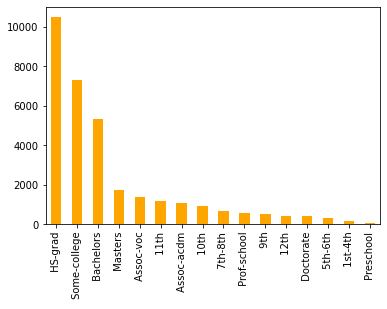

In [16]:
df.education.value_counts().plot(kind="bar", color="orange")

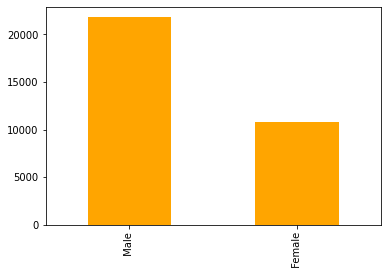

In [17]:
df.sex.value_counts().plot(kind="bar", color="orange")

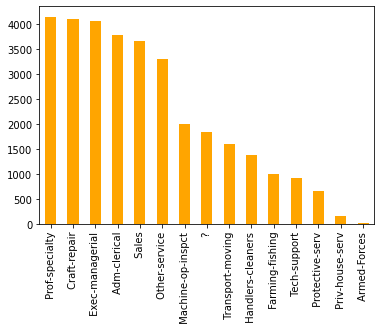

In [18]:
df.occupation.value_counts().plot(kind="bar", color="orange")


#### Identification of missing values 
<font color='blue'>We could see some missing varibales in the data with special charecter which needs to be taken care of. Listing out the features which have special charecters. </blue>


<font color='blue'>Examining each feature for the special charecters: From the below obervations we could see that the numerical features are good and does not have any missing values. </blue>


<font color='blue'>For the categorical features we have some variables with missing values. workclass, occupation and native_country have the missing values which can be replaced with Nan values and later it is imputed with most frequent values.</blue>

In [19]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [20]:
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [21]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [22]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [8]:
# Replacing the special charecters with Nan values 
## Now the Dataset filled with null values, which is easy in modeling.
df.replace(' ?', np.nan, inplace= True)

In [9]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['income'] = labelEncoder.fit_transform(df['income'])

Now the Dataset filled with null values, which is easy in modeling.

#### Question 3: 
Split the data into train and test data, What parameters do you use for splitting the data? Why? 

In [11]:
x=df.drop(['income'],axis=1)
y=df['income']

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y,random_state = 42)

<font color='blue'>We have used stratified sampling for the Target variable. In Stratified random sample we split the data in proportion to the category size instead of whole data.</blue>

In [13]:
## Checking for the missing values in the Train and test sets 
x_train.isnull().sum()

age                  0
workclass         1473
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1479
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     458
dtype: int64

In [14]:
x_test.isnull().sum()

age                 0
workclass         363
fnlwgt              0
education           0
education_num       0
marital_status      0
occupation        364
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    125
dtype: int64

In [15]:
#Selecting numerical dataframe in train set
x_train_num = x_train.select_dtypes(include=np.number)

#Selecting categorical dataframe in train set
x_train_cat = x_train.select_dtypes(exclude=['number'])

In [17]:
x_train_copy = x_train_cat.copy()

In [18]:
for df in [x_train_copy]:
    df['workclass'].fillna(x_train_copy['workclass'].mode()[0], inplace=True)
    df['occupation'].fillna(x_train_copy['occupation'].mode()[0], inplace=True)
    df['native_country'].fillna(x_train_copy['native_country'].mode()[0], inplace=True)

#### Question 4: 
Use Pipeline, ColumnTransformer and OneHotEncoder to fit and evaluate Logistic Regression, Support Vector Machines, Naïve Bayes and K-Nearest Neighbors, with cross-validation to classify the "price". Compare the performance of different algorithms on Test set. Discuss your results and findings.

<font color='blue'>we are Using OneHotEncoder for converting the categorical variables in to OneHot vectors. Usually OneHotEncoder returns a sparse array, we are using toarray() method to conevrt it into dense array. we can also acheive this by setting the sparse parameter as False in OneHotEncoder(sparse=False).</font>

<font color='blue'> The below is tested using the copy of the categorical variables for onehot encoding. </blue>

In [19]:
# OneHotEncoding for the categorical variables 
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
x_train_cat_hot = cat_encoder.fit_transform(x_train_copy)
x_train_cat_hot.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [20]:
cat_encoder.categories_

[array([' Federal-gov', ' Local-gov', ' Never-worked', ' Private',
        ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
       dtype=object),
 array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
        ' Married-spouse-absent', ' Never-married', ' Separated',
        ' Widowed'], dtype=object),
 array([' Adm-clerical', ' Armed-Forces', ' Craft-repair',
        ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
        ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
        ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
        ' Transport-moving'], dtype=object),
 array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
        ' Unmarried', ' Wife'], 

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value=0)),('Robust_scaler',RobustScaler()),])
cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent', fill_value=0)),('onehot', OneHotEncoder(handle_unknown='ignore')),])

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(x_train_num.columns)
cat_attribs = list(x_train_cat.columns)

#full pipeline of numeric and categorical attributes
full_pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),("cat",cat_pipeline,cat_attribs)])

#Using full_pipeline perform fit and transform on training data
x_train_prepared = full_pipeline.fit_transform(x_train)

In [23]:
# Using full_pipeline perform transform on training data
x_test_prepared = full_pipeline.transform(x_test)

In [24]:
x_train_prepared.shape

(26048, 105)

In [25]:
x_test_prepared.shape

(6513, 105)

In [26]:
full_pipeline.get_feature_names

<bound method ColumnTransformer.get_feature_names of ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('Robust_scaler',
                                                  RobustScaler())]),
                                 ['age', 'fnlwgt', 'education_num',
                                  'capital_gain', 'capital_loss',
                                  'hours_per_week']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='most_frequent')),
                                                 ('onehot',
                          

<font color='blue'>Pipeline: we have imputed the missing values in the pipeline with simple imupter. Missing values in the categorical features is filled with the most frequent variable. Later we have column transformed the pipeline and attributes. the full pipeline is made fit_transformed with the train data and applied the transformation for the test data. </font>


## Logistic Regression

###  Prediction with Train and Test data 

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

lgr_reg = LogisticRegression(random_state=42)
lgr_mod = lgr_reg.fit(x_train_prepared, y_train)
logreg_train_predictions = lgr_mod.predict(x_train_prepared)
logreg_test_predictions = lgr_mod.predict(x_test_prepared)

print("Accuracy on Train data :", metrics.accuracy_score(y_train,logreg_train_predictions)) 
print("Accuracy on Test data :", metrics.accuracy_score(y_test,logreg_test_predictions)) 
print("Cross validation accuracy:", cross_val_score(lgr_reg, x_train_prepared, y_train, cv=10, scoring='accuracy').mean())

Accuracy on Train data : 0.8381833538083538
Accuracy on Test data : 0.8424689083371718
Cross validation accuracy: 0.8434042415182903


## Support Vector Machines

In [42]:
from sklearn import svm

svm_clf = svm.SVC()
svm_mod = svm_clf.fit(x_train_prepared, y_train)
svm_train_predictions = svm_mod.predict(x_train_prepared)
svm_test_predictions = svm_mod.predict(x_test_prepared)
print("Accuracy on Train data :", metrics.accuracy_score(y_train,svm_train_predictions)) 
print("Accuracy on Test data :", metrics.accuracy_score(y_test,svm_test_predictions)) 
print("Cross validation accuracy:", cross_val_score(svm_clf, x_train_prepared, y_train, cv=10, scoring='accuracy').mean())

Accuracy on Train data : 0.8015586609336609
Accuracy on Test data : 0.8054659910947336
Cross validation accuracy: 0.8015587417556336


## Naïve Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_mod=gnb.fit(x_train_prepared.toarray(), y_train)
gnb_train_predictions = gnb_mod.predict(x_train_prepared.toarray())
gnb_test_predictions = gnb_mod.predict(x_test_prepared.toarray())

print("Accuracy on Train data :", metrics.accuracy_score(y_train,gnb_train_predictions)) 
print("Accuracy on Test data :", metrics.accuracy_score(y_test,gnb_test_predictions)) 
print("Cross validation accuracy:", cross_val_score(gnb, x_train_prepared.toarray(), y_train, cv=10, scoring='accuracy').mean())

Accuracy on Train data : 0.7990248771498771
Accuracy on Test data : 0.8034699831107017
Cross validation accuracy: 0.7987942955028584


## K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_mod=knn.fit(x_train_prepared, y_train)
knn_train_predictions = knn_mod.predict(x_train_prepared)
knn_test_predictions = knn_mod.predict(x_test_prepared)

print("Accuracy on Train data :", metrics.accuracy_score(y_train,knn_train_predictions)) 
print("Accuracy on Test data :", metrics.accuracy_score(y_test,knn_test_predictions)) 
print("Cross validation accuracy:", cross_val_score(knn, x_train_prepared, y_train, cv=10, scoring='accuracy').mean())

Accuracy on Train data : 0.8976504914004914
Accuracy on Test data : 0.8587440503608168
Cross validation accuracy: 0.8539621164545318


### Results and model comparisions

|  Score/ Metric                          |  LogisticReression   | Support Vector Machines | Naïve Bayes   | K-Nearest Neighbors | 
|----------------------------------------|----------------------|-------------------------|---------------|---------------------|
|Accuracy on Train data                  |    0.83818           |  0.80155                |    0.79902    | 0.89765             |
|Accuray on Test data                    |    0.84246           |  0.80546                |    0.80346    | 0.85874             |
|Cross validation Acuuracy on Train data |    0.84340           |  0.80155                |    0.79879    | 0.85396             |

<font color='blue'>Logistic Regression: From the performence metrics of logistic regression on Train with tarin data is 0.838 and Test data is 0.842. we have done the Cross validation on the Train data, the accuracy of the of the cross validation is 0.8434 which is slighlty greater than normal Train accuracy.From the cross validation results,It is clear that the classification task accuracy is correctly defined with the Logistic Regreesion. </font>

<font color='blue'>Support Vector Machines: From the performence metrics of Support Vector Machines on Train with tarin data is 0.801 and Test data is 0.8054. we have done the Cross validation on the Train data, the accuracy of the of the cross validation is 0.801 which is equal to Train accuracy.from the Cross validation results It is clear that the classification task accuracy is correctly defined with the Support Vector Machines.</font>

<font color='blue'>Naïve Bayes: From the performence metrics of Naïve Bayes on Train with tarin data is 0.799 and Test data is 0.8034. we have done the Cross validation on the Train data, the accuracy of the of the cross validation is 0.798 which is equal to Train accuracy.So form the results it is clear that the correct classification derived through the method of cross validation. </font>
 
<font color='blue'>K-Nearest Neighbors: From the performence metrics of K-Nearest Neighbors on Train with tarin data is 0.897 and Test data is 0.858. we have done the Cross validation on the Train data, the accuracy of the of the cross validation is 0.853 which is less than normal Train accuracy. Here, the Corss validation does not give equal accuracy with the Train vaidation.There is a differnce in the accuracy so it is slightly deviating.</font>

<font color= 'blue'>K-Nearest Neighbors performed very good when compared with the other models with an accuracy of 0.897 which is highest of all models.</font> 

<font color= 'blue'>K-Nearest Neighbors performed very good when compared with the other models with an accuracy of test data which is 0.858 and it is highest of all models</font>

#### Quesetion 5:
Tune the parameters of each algorithms, and evaluate the performance of the best estimators on the Test dataset, does the results improved? Discuss your results and findings.

## Logistic Regression

In [45]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
logreg = LogisticRegression()
print("Tuning Hyper Parameter with Accuracy Metrics")
clf = GridSearchCV(logreg, parameters, cv=10, scoring= 'accuracy', n_jobs = -1)
clf.fit(x_train_prepared,y_train)

Tuning Hyper Parameter with Accuracy Metrics


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 30],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy')

In [46]:
final_model = clf.best_estimator_

In [47]:
from sklearn.metrics import classification_report
print("Report:")
logreg_pred = final_model.predict(x_test_prepared)
print(metrics.accuracy_score(y_test,logreg_pred))
print(classification_report(y_test, logreg_pred))

Report:
0.8489175495163519
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4945
           1       0.73      0.59      0.65      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



## Support Vector Machines

In [28]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV
parameters = {'C':np.arange(1,10,2)}
svm_model = LinearSVC()
print("Tuning Hyper Parameter with Accuracy Metrics")
clf = RandomizedSearchCV(svm_model, parameters, cv=5, scoring= 'accuracy', n_jobs = -1)
clf.fit(x_train_prepared,y_train)

Tuning Hyper Parameter with Accuracy Metrics


RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
                   param_distributions={'C': array([1, 3, 5, 7, 9])},
                   scoring='accuracy')

In [29]:
final_model = clf.best_estimator_

In [32]:
print("Report:")
svm_pred = final_model.predict(x_test_prepared)
print(metrics.accuracy_score(y_test,svm_pred))
print(classification_report(y_test, svm_pred))

Report:
0.852141870105942
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4945
           1       0.72      0.64      0.68      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



## Naive Bayes

In [48]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb = GaussianNB()

print("Tuning Hyper Parameter with Accuracy Metrics")
gnb_clf = GridSearchCV(gnb, params_NB, cv=10, scoring= 'accuracy', n_jobs = -1, return_train_score=True)
gnb_clf.fit(x_train_prepared.toarray(),y_train)

Tuning Hyper Parameter with Accuracy Metrics


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True, scoring='accuracy')

In [49]:
final_model = gnb_clf.best_estimator_

In [50]:
print("Report:")
gnb_pred = final_model.predict(x_test_prepared.toarray())
print(metrics.accuracy_score(y_test,gnb_pred))
print(classification_report(y_test, gnb_pred))

Report:
0.8341777982496545
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4945
           1       0.67      0.60      0.64      1568

    accuracy                           0.83      6513
   macro avg       0.78      0.76      0.76      6513
weighted avg       0.83      0.83      0.83      6513



## KNN

In [113]:
params_KNN = {'n_neighbors': [1, 3, 5], 
              'p': [1, 2]}
knn = KNeighborsClassifier()
print("Tuning Hyper Parameter with Accuracy Metrics")
knn_clf = GridSearchCV(knn, params_KNN, cv=10, scoring= 'accuracy', n_jobs = -1, return_train_score=True)
knn_clf.fit(x_train_prepared,y_train)

Tuning Hyper Parameter with Accuracy Metrics


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5], 'p': [1, 2]},
             return_train_score=True, scoring='accuracy')

In [114]:
final_model = knn_clf.best_estimator_

In [115]:
print("Report:")
knn_pred = final_model.predict(x_test_prepared)
print(metrics.accuracy_score(y_test,knn_pred))
print(classification_report(y_test, knn_pred))

Report:
0.857976354982343
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      4945
           1       0.72      0.67      0.70      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.80      0.80      6513
weighted avg       0.86      0.86      0.86      6513



##  performance of the best estimators on the Test dataset with parameter tuning

|  Score/ Metric                          |  LogisticReression   | Support Vector Machines | Naïve Bayes   | K-Nearest Neighbors | 
|----------------------------------------|----------------------|-------------------------|---------------|--------------------
|Accuray on Test data without parameter tuning |    0.842          |  0.805                |    0.803     | 0.858             |
|Accuray on Test data with parameter tuning    |    0.848          |  0.852                |    0.834     | 0.857             |

<font color='blue'> We performed paarmeter tuning on the models with different tuning parameters and observed increase in the performence metrics of Support Vector Machines and Naïve Bayes classification algorithms.
    
<font color='blue'>Where as there is not much change in the performence of LogisticReression and K-Nearest Neighbors. Even after tuning the parameters in the algorithm K-Nearest Neighbors is the best classification model next to Support Vector Machines.</font>



### Data for Multiple-class Classification:
* URL: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones
* Column “Activity” is the target label to classify.

In [51]:
#Import libraries
import pandas as pd
# To do linear algebra
import numpy as np
from numpy import pi

np.random.seed(42)

# To create plots
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt

# To create nicer plots
import seaborn as sns

# To create interactive plots
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings(action="ignore")

In [52]:
# On Kaggle Notebook, after adding the data, you can import the data as Pandas DataFrame as follows
import pandas as pd
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [53]:
print(df_train.shape)
print(df_test.shape)

(7352, 563)
(2947, 563)


In [54]:
df_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


## Pre-Processing Data

In [55]:
columns = df_train.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

df_train.columns = columns
df_test.columns = columns

df_train.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [56]:
print('Labels:', df_train['Activity'].unique())

Labels: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [57]:
print('Labels:', df_test['Activity'].unique())

Labels: ['STANDING' 'SITTING' 'LAYING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAccmeanX to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAccmeanX to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [60]:
print("Number of null values in train data:" ,df_train.isnull().sum().sum())

Number of null values in train data: 0


In [61]:
print("Number of null values in test data:" ,df_test.isnull().sum().sum())

Number of null values in test data: 0


In [63]:
print('No of duplicates in train data: {}'.format(sum(df_train.duplicated())))

No of duplicates in train data: 0


In [64]:
print('No of duplicates in test data: {}'.format(sum(df_test.duplicated())))

No of duplicates in test data: 0


#### Question 1:
Create plots to visualize the distribution of the label "Activity". If the distribution of each class is balanced?
If imbalanced, what strategies would you adopt and why?

<font color='blue'>Imbalanced data is one of the major issues in machine learning as there won't be any guaranty that data collected will always be balanced. Here we can say that distribution of data is balanced as data seems equally distributed with small fluctuations.
    
We can assume and divide the activities into two categories, Laying, Standing, Sitting activities into one category and Walking, Walking upstairs, Walking downstairs as another category. We can observe some variance between Walking upstairs and Walking downstairs activities, but we believe that we can ignore this small variation as this might be because of different walking styles of individuals having a constant sampling rate in smartphones.

If data is imbalanced, we can adopt strategies like Downsampling, Upsampling, Synthetic Minority Oversampling Technique (SMOTE). We prefer to perform SMOTE if the data distribution is imbalanced as this technique tries to add a new instance that is similar to the original data.</font>

In [65]:
df_train.Activity.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [66]:
df_test.Activity.value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: Activity, dtype: int64

In [67]:
pd.crosstab(df_train.subject, df_train.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
1,50,47,53,95,49,53
3,62,52,61,58,49,59
5,52,44,56,56,47,47
6,57,55,57,57,48,51
7,52,48,53,57,47,51
8,54,46,54,48,38,41
11,57,53,47,59,46,54
14,51,54,60,59,45,54
15,72,59,53,54,42,48


In [68]:
pd.crosstab(df_test.subject, df_test.Activity)

Activity,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
subject,,,,,,
2,48,46,54,59,47,48
4,54,50,56,60,45,52
9,50,50,45,52,42,49
10,58,54,44,53,38,47
12,60,51,61,50,46,52
13,62,49,57,57,47,55
18,65,57,73,56,55,58
20,68,66,73,51,45,51
24,72,68,69,58,55,59


In [69]:
# Plotting data
label_counts = df_train.Activity.value_counts()


# Get colors
n = label_counts.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
activity_data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

fig_layout = go.Layout(title = 'Smartphone Activity Label Distribution for train data',
                   xaxis = dict(title = 'Activity'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[activity_data], layout=fig_layout)
iplot(fig)

In [70]:
# Plotting data
label_counts1 = df_test.Activity.value_counts()


# Get colors
n = label_counts1.shape[0]
colormap = get_cmap('viridis')
colors = [rgb2hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
activity_data = go.Bar(x = label_counts1.index,
              y = label_counts1,
              marker = dict(color = colors))

fig_layout = go.Layout(title = 'Smartphone Activity Label Distribution for test data',
                   xaxis = dict(title = 'Activity'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[activity_data], layout=fig_layout)
iplot(fig)

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

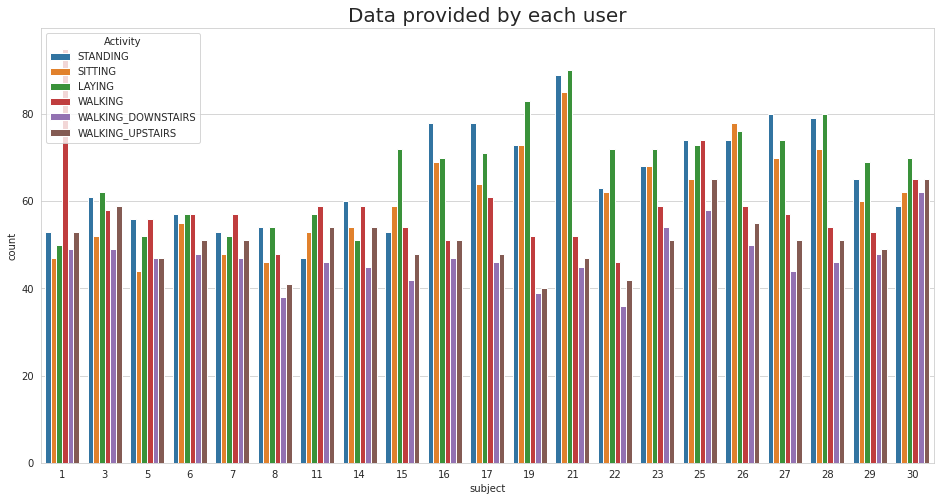

In [72]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df_train)
plt.show()

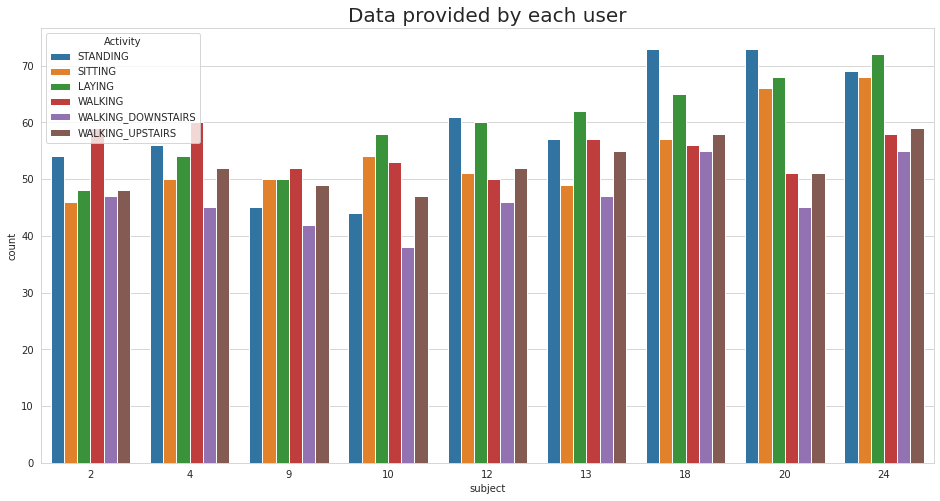

In [73]:
plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = df_test)
plt.show()

#### Question 2:
Evaluate the performance of Logistic Regression, Support Vector Machines, Naïve Bayes and K-Nearest Neighbors, with cross-validation. Which classifiers is not capable of handling multiple classes natively? Then what strategy/strategies can be applied to perform multiclass classification for those algorithms. Compare the performance of different algorithms on Test set. 

<font color='blue'>Native classifiers like Logistic Regression, Perceptron, Support Vector Machines are designed for binary classification problems. We cannot use these types of algorithms directly on multiclass classification problems. To handle this problem we can use heuristic methods that can be used to split a multi-class classification problem into multiple binary classification datasets and train a binary classification model on each dataset. The heuristic methods are One-vs-Rest (OvR) and One-vs-One (OvO). For algorithms like Support Vector Machine classifiers, which perform poorly with the size of the training set, we can prefer OvO as it is faster to train many classifiers on small training datasets than training few classifiers on large training datasets. For binary classification algorithms like Logistic regression, OvR methods are preferred.</font>

<font color='blue'>While utilizing these algorithms from Scikit-Learn, we no need to handle these methods explicitly, as Scikit-Learn automatically detects when we try to use a binary classification algorithm for a multiclass classification problem. OvR method will be the default for binary classification algorithms except for SVM classifiers, which utilizes the OvO method.</font>

In [74]:
Activity_prepared = df_train.drop(['subject', 'Activity'], axis=1) # drop labels for training set
Activity_labels = df_train["Activity"].copy()
Activity_test = df_test.drop(['subject', 'Activity'], axis=1)
Activity_test_labels = df_test["Activity"].copy()

In [75]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
encode = LabelEncoder()
Activity_labels = encode.fit_transform(Activity_labels)
Activity_test_labels = encode.fit_transform(Activity_test_labels)

In [76]:
Activity_prepared

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


## Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
logreg.fit(Activity_prepared, Activity_labels)
logreg_train_predictions = logreg.predict(Activity_prepared)
logreg_test_predictions = logreg.predict(Activity_test)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,logreg_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,logreg_test_predictions))

print("Cross validation accuracy:",cross_val_score(logreg, Activity_prepared, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9907508161044614
Accuracy on Test data: 0.9586019681031558
Cross validation accuracy: 0.9451909568175096


## OneVsRestClassifier with LogisticRegression

In [78]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier

logreg = OneVsRestClassifier(LogisticRegression())
logreg.fit(Activity_prepared, Activity_labels)
logreg_train_predictions = logreg.predict(Activity_prepared)
logreg_test_predictions = logreg.predict(Activity_test)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,logreg_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,logreg_test_predictions))
print("Cross validation accuracy:",cross_val_score(logreg, Activity_prepared, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9910228509249184
Accuracy on Test data: 0.9647098744485918
Cross validation accuracy: 0.9484540446613428


## Support Vector Machines

In [79]:
from sklearn.svm import SVC
svc_model = SVC()

svc_model.fit(Activity_prepared, Activity_labels)
svc_model_train_predictions = svc_model.predict(Activity_prepared)
svc_model_test_predictions = svc_model.predict(Activity_test)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,svc_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,svc_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(svc_model, Activity_prepared, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9790533188248096
Accuracy on Test data: 0.9504580929759077
Cross validation accuracy: 0.9397478556640048


## OneVsOneClassifier with Support Vector Machines

In [80]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
svc_model = OneVsOneClassifier(SVC())

svc_model.fit(Activity_prepared, Activity_labels)
svc_model_train_predictions = svc_model.predict(Activity_prepared)
svc_model_test_predictions = svc_model.predict(Activity_test)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,svc_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,svc_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(svc_model, Activity_prepared, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9793253536452666
Accuracy on Test data: 0.9491007804546997
Cross validation accuracy: 0.9412442694469092


## Naive Bayes

In [81]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(Activity_prepared, Activity_labels)
gnb_model_train_predictions = gnb.predict(Activity_prepared)
gnb_model_test_predictions = gnb.predict(Activity_test)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,gnb_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,gnb_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(gnb, Activity_prepared, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.7463275299238302
Accuracy on Test data: 0.7702748557855447
Cross validation accuracy: 0.6979094572611654


## KNN

In [82]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Activity_prepared, Activity_labels)
knn_model_train_predictions = knn.predict(Activity_prepared)
knn_model_test_predictions = knn.predict(Activity_test)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,knn_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,knn_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(knn, Activity_prepared, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.984221980413493
Accuracy on Test data: 0.9002375296912114
Cross validation accuracy: 0.9065640712806861


## Results and Model comparisions

|  Score/ Metric                          |  LogisticReression   | Support Vector Machines | Naïve Bayes   | K-Nearest Neighbors | 
|----------------------------------------|----------------------|-------------------------|---------------|---------------------|
|Accuracy on Train data                  |    0.991           |  0.979                |    0.746    | 0.984             |
|Accuray on Test data                    |    0.964           |  0.949                |    0.770    | 0.900             |
|Cross validation Acuuracy on Train data |    0.948           |  0.941                |    0.697    | 0.906             |

<font color='blue'>Logistic Regression: From the performence metrics of logistic regression on Train with tarin data is 0.991 and Test data is 0.964. we have done the Cross validation on the Train data, the accuracy of the of the cross validation is 0.948 which is less than normal Train accuracy.From the cross validation results,It is clear that the classification task accuracy is not correctly defined with the Logistic Regreesion. which is deviating from the Train accuracy.</font>

<font color='blue'>Support Vector Machines: From the performence metrics of Support Vector Machines on Train with tarin data is 0.979 and Test data is 0.949. we have done the Cross validation on the Train data, the accuracy of the of the cross validation is 0.941 which is less than Train accuracy.from the Cross validation results It is clear that the classification task accuracy is not correctly defined with the Support Vector Machines.and it is is deviating from the Train accuracy but it is equal to test data accuracy.</font>

<font color='blue'>Naïve Bayes: From the performence metrics of Naïve Bayes on Train with tarin data is 0.746 and Test data is 0.770. we have done the Cross validation on the Train data, the accuracy of the of the cross validation is 0.697 which is less than Train accuracy.So form the results it is clear that the classification accuracy is not correctly defined with the train data accuracy.</font>
 
<font color='blue'>K-Nearest Neighbors: From the performence metrics of K-Nearest Neighbors on Train with tarin data is 0.984 and Test data is 0.900. we have done the Cross validation on the Train data, the accuracy of the of the cross validation is 0.906 which is less than normal Train accuracy. Here, the Corss validation does not give equal accuracy with the Train vaidation.There is a differnce in the accuracy so it is highly deviating.But it is euqal with the test data accuracy.</font>

<font color= 'blue'>Logistic Regression performed very good when compared with the other models with an accuracy of 0.991 which is highest of all models.</font>

<font color= 'blue'>Logistic Regression performed very good when compared with the other models with an accuracy of test data which is 0.964 and it is highest of all models</font>


#### Question 3:
Would scaling the features affect the classification results? Discuss your results and findings.

## Standard scaler

In [83]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
Activity_prepared_scaled = stdScaler.fit_transform(Activity_prepared.values)
Activity_test_scaled = stdScaler.transform(Activity_test.values)

## Logistic Regression

In [84]:
logreg = LogisticRegression()
logreg.fit(Activity_prepared_scaled, Activity_labels)
logreg_train_predictions = logreg.predict(Activity_prepared_scaled)
logreg_test_predictions = logreg.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,logreg_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,logreg_test_predictions))
print("Cross validation accuracy:",cross_val_score(logreg, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9964635473340587
Accuracy on Test data: 0.9545300305395318
Cross validation accuracy: 0.9458712289263531


## OneVsRestClassifier with LogisticRegression

In [87]:
logreg = OneVsRestClassifier(LogisticRegression())
logreg.fit(Activity_prepared_scaled, Activity_labels)
logreg_train_predictions = logreg.predict(Activity_prepared_scaled)
logreg_test_predictions = logreg.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,logreg_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,logreg_test_predictions))
print("Cross validation accuracy:",cross_val_score(logreg, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9949673558215452
Accuracy on Test data: 0.9579233118425518
Cross validation accuracy: 0.9469580005915409


## Support Vector Machines

In [88]:
svc_model = SVC()

svc_model.fit(Activity_prepared_scaled, Activity_labels)
svc_model_train_predictions = svc_model.predict(Activity_prepared_scaled)
svc_model_test_predictions = svc_model.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,svc_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,svc_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(svc_model, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9866702937976061
Accuracy on Test data: 0.9518154054971157
Cross validation accuracy: 0.9377087030464359


## OneVsOneClassifier with Support Vector Machines

In [89]:
svc_model = OneVsOneClassifier(SVC())

svc_model.fit(Activity_prepared_scaled, Activity_labels)
svc_model_train_predictions = svc_model.predict(Activity_prepared_scaled)
svc_model_test_predictions = svc_model.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,svc_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,svc_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(svc_model, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9934711643090316
Accuracy on Test data: 0.9548693586698337
Cross validation accuracy: 0.9373014640638864


## Naive Bayes

In [90]:
gnb = GaussianNB()

gnb.fit(Activity_prepared_scaled, Activity_labels)
gnb_model_train_predictions = gnb.predict(Activity_prepared_scaled)
gnb_model_test_predictions = gnb.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,gnb_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,gnb_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(gnb, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.7461915125136017
Accuracy on Test data: 0.7702748557855447
Cross validation accuracy: 0.697773587695948


## KNN

In [91]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Activity_prepared_scaled, Activity_labels)
knn_model_train_predictions = knn.predict(Activity_prepared_scaled)
knn_model_test_predictions = knn.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,knn_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,knn_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(knn, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9828618063112078
Accuracy on Test data: 0.8836104513064132
Cross validation accuracy: 0.8826240387459332


## Robust scaler

In [92]:
from sklearn.preprocessing import RobustScaler
rbtScaler = RobustScaler()
Activity_prepared_scaled = rbtScaler.fit_transform(Activity_prepared.values)
Activity_test_scaled = rbtScaler.transform(Activity_test.values)

## Logistic Regression

In [94]:
logreg = LogisticRegression()
logreg.fit(Activity_prepared_scaled, Activity_labels)
logreg_train_predictions = logreg.predict(Activity_prepared_scaled)
logreg_test_predictions = logreg.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,logreg_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,logreg_test_predictions))
print("Cross validation accuracy:",cross_val_score(logreg, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9946953210010882
Accuracy on Test data: 0.9528333898880217
Cross validation accuracy: 0.9402942916296952


## OneVsRestClassifier with LogisticRegression

In [96]:
logreg = OneVsRestClassifier(LogisticRegression())
logreg.fit(Activity_prepared_scaled, Activity_labels)
logreg_train_predictions = logreg.predict(Activity_prepared_scaled)
logreg_test_predictions = logreg.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,logreg_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,logreg_test_predictions))
print("Cross validation accuracy:",cross_val_score(logreg, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9929270946681176
Accuracy on Test data: 0.9596199524940617
Cross validation accuracy: 0.9396138346643005


## Support Vector Machines

In [97]:
svc_model = SVC()

svc_model.fit(Activity_prepared_scaled, Activity_labels)
svc_model_train_predictions = svc_model.predict(Activity_prepared_scaled)
svc_model_test_predictions = svc_model.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,svc_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,svc_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(svc_model, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9775571273122959
Accuracy on Test data: 0.9355276552426196
Cross validation accuracy: 0.9099556344276843


## OneVsOneClassifier with Support Vector Machines

In [98]:
svc_model = OneVsOneClassifier(SVC())

svc_model.fit(Activity_prepared_scaled, Activity_labels)
svc_model_train_predictions = svc_model.predict(Activity_prepared_scaled)
svc_model_test_predictions = svc_model.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,svc_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,svc_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(svc_model, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9915669205658324
Accuracy on Test data: 0.9453681710213777
Cross validation accuracy: 0.9196160529429163


## Naive Bayes

In [99]:
gnb = GaussianNB()

gnb.fit(Activity_prepared_scaled, Activity_labels)
gnb_model_train_predictions = gnb.predict(Activity_prepared_scaled)
gnb_model_test_predictions = gnb.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,gnb_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,gnb_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(gnb, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.7463275299238302
Accuracy on Test data: 0.7702748557855447
Cross validation accuracy: 0.6979094572611654


## KNN

In [100]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(Activity_prepared_scaled, Activity_labels)
knn_model_train_predictions = knn.predict(Activity_prepared_scaled)
knn_model_test_predictions = knn.predict(Activity_test_scaled)

print("Accuracy on Train data:",metrics.accuracy_score(Activity_labels,knn_model_train_predictions)) 
print("Accuracy on Test data:",metrics.accuracy_score(Activity_test_labels,knn_model_test_predictions))
print("Cross validation accuracy:",cross_val_score(knn, Activity_prepared_scaled, Activity_labels, cv=10, scoring='accuracy').mean())

Accuracy on Train data: 0.9453210010881393
Accuracy on Test data: 0.829317950458093
Cross validation accuracy: 0.8450728334812186


## Results and Comparisions


### Standard Scalar

|  Score/ Metric                          |  LogisticReression   | Support Vector Machines | Naïve Bayes   | K-Nearest Neighbors | 
|----------------------------------------|----------------------|-------------------------|---------------|---------------------|
|Accuracy on Train data                  |    0.994           |  0.993                |    0.746    | 0.982             |
|Accuray on Test data                    |    0.957           |  0.954               |    0.770    | 0.883             |
|Cross validation Acuuracy on Train data |    0.946           |  0.937                |    0.697    | 0.982             |


### Robust Scalar

|  Score/ Metric                          |  LogisticReression   | Support Vector Machines | Naïve Bayes   | K-Nearest Neighbors | 
|----------------------------------------|----------------------|-------------------------|---------------|---------------------|
|Accuracy on Train data                  |    0.992           |  0.991                |    0.746    | 0.945             |
|Accuray on Test data                    |    0.959           |  0.945                |    0.770    | 0.829             |
|Cross validation Acuuracy on Train data |    0.939           |  0.919                |    0.697    | 0.845             |


<font color = 'blue'>We perfomed scaling on the models usind standard scalar and Robust scalar methods, Both methods did not show improvement in the performence of Logistic Regression and Naive Bayes classification algorithms. 

We have observed an increase in the performence of Support Vector Machines on both scaling methods. For KNN algorithm performence reduced in the Robust scalar method.</font>

#### Question 4:
Tune the parameters of each algorithms, then evaluate the performance of the best estimators on the Test dataset, does the results improved? Discuss your results and findings.

## SVC

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import svm
model = svm.SVC()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

#score = 'accuracy'
print("Tuning Hyper Parameter with Accuracy Metrics")
svc_clf = GridSearchCV(model, tuned_parameters, cv=10, scoring= 'accuracy')
svc_clf.fit(Activity_prepared_scaled,Activity_labels)

Tuning Hyper Parameter with Accuracy Metrics


GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             scoring='accuracy')

In [102]:
#clf.fit(Activity_prepared_scaled,Activity_labels)
final_model = svc_clf.best_estimator_

In [103]:
print("Report:")
svc_pred = final_model.predict(Activity_test_scaled)
print(metrics.accuracy_score(Activity_test_labels,svc_pred)) 
print(classification_report(Activity_test_labels, svc_pred))

Report:
0.9552086868001357
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.96      0.90      0.93       491
           2       0.92      0.97      0.94       532
           3       0.94      0.99      0.96       496
           4       0.98      0.92      0.95       420
           5       0.94      0.95      0.94       471

    accuracy                           0.96      2947
   macro avg       0.96      0.95      0.95      2947
weighted avg       0.96      0.96      0.96      2947



## Logistic regression

In [104]:
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}

logreg = LogisticRegression()
print("Tuning Hyper Parameter with Accuracy Metrics")
logreg_clf = GridSearchCV(logreg, parameters, cv=10, scoring= 'accuracy', n_jobs = -1,  return_train_score=True)
logreg_clf.fit(Activity_prepared_scaled,Activity_labels)

Tuning Hyper Parameter with Accuracy Metrics


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 30],
                         'penalty': ['l2', 'l1']},
             return_train_score=True, scoring='accuracy')

In [105]:
final_model = logreg_clf.best_estimator_

In [106]:
print("Report:")
logreg_pred = final_model.predict(Activity_test_scaled)
print(metrics.accuracy_score(Activity_test_labels,logreg_pred)) 
print(classification_report(Activity_test_labels, logreg_pred))

Report:
0.9528333898880217
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       537
           1       0.96      0.87      0.91       491
           2       0.91      0.96      0.94       532
           3       0.94      0.99      0.96       496
           4       0.99      0.94      0.96       420
           5       0.96      0.94      0.95       471

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



## Naive Bayes

In [107]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gnb = GaussianNB()

print("Tuning Hyper Parameter with Accuracy Metrics")
gnb_clf = GridSearchCV(gnb, params_NB, cv=10, scoring= 'accuracy', n_jobs = -1, return_train_score=True)
gnb_clf.fit(Activity_prepared_scaled,Activity_labels)

Tuning Hyper Parameter with Accuracy Metrics


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             return_train_score=True, scoring='accuracy')

In [108]:
final_model = gnb_clf.best_estimator_

In [109]:
print("Report:")
gnb_pred = final_model.predict(Activity_test_scaled)
print(metrics.accuracy_score(Activity_test_labels,gnb_pred)) 
print(classification_report(Activity_test_labels, gnb_pred))

Report:
0.8177807940278249
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       537
           1       0.95      0.50      0.66       491
           2       0.68      0.95      0.79       532
           3       0.83      0.84      0.83       496
           4       0.83      0.61      0.70       420
           5       0.76      0.96      0.85       471

    accuracy                           0.82      2947
   macro avg       0.84      0.81      0.80      2947
weighted avg       0.84      0.82      0.81      2947



 ## KNN

In [110]:
params_KNN = {'n_neighbors': [1, 3, 5], 
              'p': [1, 2]}
knn = KNeighborsClassifier()
print("Tuning Hyper Parameter with Accuracy Metrics")
knn_clf = GridSearchCV(knn, params_KNN, cv=10, scoring= 'accuracy', n_jobs = -1, return_train_score=True)
knn_clf.fit(Activity_prepared_scaled,Activity_labels)

Tuning Hyper Parameter with Accuracy Metrics


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 3, 5], 'p': [1, 2]},
             return_train_score=True, scoring='accuracy')

In [111]:
final_model = knn_clf.best_estimator_

In [112]:
print("Report:")
knn_pred = final_model.predict(Activity_test_scaled)
print(metrics.accuracy_score(Activity_test_labels,knn_pred)) 
print(classification_report(Activity_test_labels, knn_pred))

Report:
0.9015948422124194
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       537
           1       0.94      0.83      0.88       491
           2       0.86      0.95      0.90       532
           3       0.81      0.98      0.89       496
           4       0.97      0.71      0.82       420
           5       0.87      0.90      0.88       471

    accuracy                           0.90      2947
   macro avg       0.91      0.89      0.90      2947
weighted avg       0.91      0.90      0.90      2947



## performance of the best estimators on the Test dataset with parameter tuning

|  Score/ Metric                          |  LogisticReression   | Support Vector Machines | Naïve Bayes   | K-Nearest Neighbors | 
|----------------------------------------|----------------------|-------------------------|---------------|--------------------
|Accuray on Test data without parameter tuning |    0.959          |  0.945                |    0.770     | 0.829            |
|Accuray on Test data with parameter tuning    |    0.952          |  0.955                |    0.817     | 0.901             |

<font color='blue'> We performed paarmeter tuning on the models with different tuning parameters and observed increase in the performence metrics of Support Vector Machines, Naïve Bayes classification and K-Nearest Neighbors algorithms.
    
<font color='blue'>Where as there is not much change in the performence of LogisticReression. After tuning the parameters in the algorithm Support Vector Machines is the best classification model next to LogisticReression.</font>

